# Project 1: SAT & ACT Analysis

## Problem Statement

- Choose new states to focus on increasing participation in the SAT
- Identify 3 potential states for investigation
- Decide on 1 target state for expansion

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [369]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [659]:
#read in SAT & ACT datasets from 2017
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [371]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [372]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [373]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [374]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Answer: The data are tables with string containing the states including DC and a National roundup. There is a participation rate in string form. There are also what appear to be mean scores for each subject area, including the cumulative total. 

#### 4a. Does the data look complete? 

Answer: Yes, given a lack of Null/NAN values.

In [375]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [376]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [662]:
act_2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [663]:
act_2017.max()

State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object

In [660]:
sat_2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [664]:
sat_2017.max()

State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

|ACT Section|Minimum|
|---|---|
|Participation|        60%|
|English|             16.3|
|Math  |                18|
|Reading |            18.1|
|Science  |            2.3|
|Composite|           17.8|

|ACT Section| Maximum|
|---|---|
|Participation |       98%|
|English      |       25.5|
|Math        |        25.3|
|Reading    |           26|
|Science   |          24.9|
|Composite|           25.5|

|SAT Section| Minimum|
|---|---|
|Participation                      |       10%|
|Evidence-Based Reading and Writing|        482|
|Math  |                                     52|
|Total|                                     950|

|SAT Section| Maximum|
|---|---|
|Participation                       |96%|
|Evidence-Based Reading and Writing  |644|
|Math    |651|
|Total |1295|

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [379]:
### Used scatterplots down below to identify this outlier.
### Using info from https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf
### Replacing it with correct values and re-running the notebook.
sat_2017.Math.min()
sat_2017[sat_2017['Math'] == 52]
sat_2017.loc[sat_2017['State'] == 'Maryland','Math'] = 524


In [380]:
sat_2017[sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


#### 5. What are your data types? 
Display the data types of each feature. 

In [381]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [382]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: I will need to convert the percenage columns into scaled 0-1.0 decimals from strings. Composite score of SATs is an object which means there's some strings in there.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [383]:
#define a function to take a string with a number
#followed by a % sign, strip the % and convert it to
#an int
def str_percentage_to_int(string):
    return(int(string.replace("%","")))
    

In [384]:
act_2017['Participation'] = act_2017['Participation'].apply(str_percentage_to_int)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [385]:
sat_2017['Participation'] = sat_2017['Participation'].apply(str_percentage_to_int)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [386]:
#code adapted from Cameron's tutorial on cleaning data

for idx, val in act_2017['Composite'].iteritems():
    if type(val) != float:
        try:
            act_2017.loc[idx, 'Composite'] = float(val)
        except:
            print(f'{idx}: {val}')

51: 20.2x


In [387]:
# correct MD's science score from
# https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
act_2017.loc[21:,'Science'] = 23

In [388]:
act_2017.loc[51, 'Composite'] = 20.2  

In [389]:
type(act_2017.loc[51, 'Composite'])

float

In [390]:
#code adapted from Cameron's tutorial on cleaning data
#check again!

for idx, val in act_2017['Composite'].iteritems():
    if type(val) != float:
        try:
            act_2017.loc[idx, 'Composite'] = float(val)
        except:
            print(f'{idx}: {val}')

In [391]:
act_2017.dtypes

#something didn't work!

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [392]:
#cast the whole column using .astype
act_2017['Composite'] = act_2017['Composite'].astype(dtype='float64')

In [393]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [394]:
#convert all states to lowercase
act_2017['State'] = act_2017['State'].apply(str.lower)
sat_2017['State'] = sat_2017['State'].apply(str.lower)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [395]:
act_2017.columns = act_2017.columns.str.lower()
sat_2017.columns = sat_2017.columns.str.lower()

In [396]:
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [397]:
sat_2017.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

- Display the data types again to confirm they are correct.

In [398]:
act_2017.dtypes

state             object
participation      int64
english          float64
math             float64
reading          float64
science          float64
composite        float64
dtype: object

In [399]:
sat_2017.dtypes

state                                 object
participation                          int64
evidence-based reading and writing     int64
math                                   int64
total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [400]:
#remap the column names to allow for future comingling
# of data and easier readability

act_2017.rename(columns={
    'state': 'state',
    'participation': 'act_participation_rate_2017',
    'english':'act_english_2017',
    'math':'act_math_2017',
    'reading':'act_reading_2017',
    'science':'act_science_2017',
    'composite':'act_composite_2017'
}, inplace=True)

sat_2017.rename(columns={
    'state':'state',
    'participation':'sat_participation_rate_2017',
    'evidence-based reading and writing':'sat_reading_writing_2017',
    'math':'sat_math_2017',
    'total':'sat_composite_2017'
}, inplace=True)    

In [401]:
act_2017.columns

Index(['state', 'act_participation_rate_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_composite_2017'],
      dtype='object')

In [402]:
sat_2017.columns

Index(['state', 'sat_participation_rate_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

| Feature                       | Type   | Dataset    | Description                                                                 |
|-------------------------------|--------|------------|-----------------------------------------------------------------------------|
| state                         | object | both       | The name of the state that the data refers to                               |
| act_participation_rate_2017   | float  | ACT 2017   | The percentage rate of participation                                        |
| act_english_2017              | float  | ACT 2017   | The average score for the English subtest in 2017                           |
| act_math_2017                 | float  | ACT 2017   | The average score for the Math subtest in 2017                              |
| act_science_2017              | float  | ACT 2017   | The average score for the Science subtest in 2017                           |
| act_reading_2017              | float  | ACT 2017   | The average score for the Reading subtest in 2017                           |
| act_composite_2017            | float  | ACT 2017   | The average composite ACT score in 2017                                     |
| act_participation_rate_2018   | float  | ACT 2018   | The percentage rate of participation                                        |
| act_composite_2018            | float  | ACT 2018   | The average composite ACT score in 2017                                     |
| sat_participation_rate_2017   | float  | SAT 2017   | The percentage rate of participation                                        |
| sat_reading_writing_2017      | float  | SAT 2017   | The average score on the Evidence Based Reading and Writing subtest in 2017 |
| sat_math_2017                 | float  | SAT 2017   | The average score on the Math subtest in 2017                               |
| sat_composite_2017            | float  | SAT 2017   | The average composite score on the SAT in  2017                             |
| sat_participation_rate_2018   | float  | SAT 2018   | The percentage rate of participation                                        |
| sat_reading_writing_2018      | float  | SAT 2018   | The average score on the Evidence Based Reading and Writing subtest in 2018 |
| sat_math_2018                 | float  | SAT 2018   | The average score on the Math subtest in 2018                               |
| sat_composite_2018            | float  | SAT 2018   | The average composite score on the SAT in  2018                             |
| sat_participation_rate_change | float  | Calculated | Calculated change in participation rates between 2017 and 2018              |
| act_participation_rate_change | float  | Calculated | Calculated change in participation rates between 2017 and 2018              |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [403]:
act_2017.drop([0], inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [404]:
#Merge the databases using the 'state' value as the key
combined_2017 = act_2017.merge(sat_2017,left_on='state', right_on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [405]:
combined_2017.to_csv("../data/combined_2017.csv", index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [406]:
act_2018 = pd.read_csv("../data/act_2018.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [407]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [408]:
#convert participation rates into ints
act_2018['Participation'] = act_2018['Participation'].apply(str_percentage_to_int)

In [409]:
#convert all states to lowercase
act_2018['State'] = act_2018['State'].apply(str.lower)
sat_2018['State'] = sat_2018['State'].apply(str.lower)

In [410]:
#chance column names to lowercase and co-existence with other columns
act_2018.rename(columns={
    'State': 'state',
    'Participation': 'act_participation_rate_2018',
    'Composite':'act_composite_2018'
}, inplace=True)



In [411]:
#check datatypes - all looks good!
act_2018.dtypes

state                           object
act_participation_rate_2018      int64
act_composite_2018             float64
dtype: object

In [412]:
act_2018.head()
act_2018.shape

(52, 3)

In [413]:
act_2018['state'].value_counts()
#There are two Maines!

maine                   2
montana                 1
wisconsin               1
kentucky                1
california              1
iowa                    1
pennsylvania            1
ohio                    1
nevada                  1
oklahoma                1
missouri                1
louisiana               1
nebraska                1
rhode island            1
mississippi             1
texas                   1
idaho                   1
georgia                 1
south dakota            1
illinois                1
vermont                 1
north carolina          1
massachusetts           1
indiana                 1
new jersey              1
arkansas                1
wyoming                 1
oregon                  1
new york                1
north dakota            1
michigan                1
arizona                 1
south carolina          1
tennessee               1
washington              1
delaware                1
florida                 1
maryland                1
kansas      

In [414]:
#check to see what data is there
act_2018[act_2018['state'] == 'Maine']

,state,act_participation_rate_2018,act_composite_2018


In [415]:
#drop duplicate values
act_2018.drop_duplicates('state', inplace=True)

In [416]:
act_2018.shape
#now it looks good

(51, 3)

In [417]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,alabama,6%,595,571,1166
1,alaska,43%,562,544,1106
2,arizona,29%,577,572,1149
3,arkansas,5%,592,576,1169
4,california,60%,540,536,1076


In [418]:
#convert participation rates into ints
sat_2018['Participation'] = sat_2018['Participation'].apply(str_percentage_to_int)

In [419]:
#chance column names to lowercase and co-existence with other columns

sat_2018.rename(columns={
    'State':'state',
    'Participation':'sat_participation_rate_2018',
    'Evidence-Based Reading and Writing':'sat_reading_writing_2018',
    'Math':'sat_math_2018',
    'Total':'sat_composite_2018'
}, inplace=True)    

In [420]:
#check datatypes - all looks good!
sat_2018.dtypes

state                          object
sat_participation_rate_2018     int64
sat_reading_writing_2018        int64
sat_math_2018                   int64
sat_composite_2018              int64
dtype: object

In [421]:
sat_2018.head()
sat_2018.shape

(51, 5)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [422]:
combined_2018 = act_2018.merge(sat_2018,
                               left_on='state',
                               right_on='state')
combined = combined_2018.merge(combined_2017,
                               left_on='state',
                               right_on='state')
combined.head()

In [425]:
combined.shape

(51, 17)

In [426]:
combined.to_csv("../data/final.csv", index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [427]:
#Code:
combined.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,17,17.0,17.0,17.0,17.0,17,17.0,17.0,17.0,17.0,...,17,17,17.0,17,17.0,17,17.0,17,17.0,17
unique,16,16.0,16.0,15.0,16.0,16,14.0,14.0,15.0,16.0,...,16,16,14.0,16,17.0,17,16.0,17,14.0,15
top,100,19.8,19.8,19.4,22.7,100,25.6,24.1,23.5,19.4,...,3,100,20.7,100,24.4,29,21.9,1086,20.5,100
freq,2,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,2.0,...,2,2,3.0,2,1.0,1,2.0,1,2.0,2


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [428]:
# quick reminder of st dev from
# https://revisionmaths.com/gcse-maths-revision/statistics-handling-data/standard-deviation

def st_dev(array):
    total= 0
    mean = np.mean(array)
    for n in array:
        total+=(mean - n)**2
    return((total / len(array))**.5)

In [429]:
# drop the index and set it to state to make the transpose work
combined.index = combined['state']
combined.drop(columns = 'state', inplace=True)

In [430]:
combined.T.describe()

state,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district of columbia,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,...,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000,16.000000
mean,311.731250,291.900000,302.137500,317.306250,285.562500,301.262500,287.381250,272.800000,265.881250,289.28125,...,325.325000,328.075000,277.98125,301.681250,299.031250,297.881250,289.37500,279.39375,343.793750,331.512500
std,411.753382,385.781442,400.015556,420.256919,375.293757,392.535833,364.705873,347.709187,334.532016,369.37014,...,435.511515,434.703179,359.32332,399.735073,393.507189,390.502678,379.44609,367.92075,457.768634,440.083513
min,5.000000,18.700000,18.600000,3.000000,22.200000,11.000000,24.600000,17.000000,23.500000,19.00000,...,3.000000,5.000000,19.50000,3.000000,23.000000,23.000000,20.90000,14.00000,3.000000,3.000000
25%,19.050000,20.275000,19.800000,19.300000,22.775000,20.875000,25.575000,23.750000,24.350000,19.87500,...,21.725000,19.575000,21.00000,20.200000,23.900000,23.875000,22.17500,20.37500,20.475000,19.950000
50%,59.850000,40.500000,46.000000,59.850000,42.000000,65.000000,65.500000,62.400000,62.000000,69.50000,...,50.000000,61.500000,53.50000,61.500000,44.500000,47.000000,46.50000,46.50000,61.500000,61.500000
75%,577.250000,544.750000,565.250000,592.500000,532.250000,538.000000,521.750000,494.750000,480.500000,527.25000,...,613.500000,611.000000,512.25000,551.000000,556.000000,552.750000,538.75000,516.75000,643.750000,625.250000
max,1166.000000,1106.000000,1149.000000,1208.000000,1076.000000,1201.000000,1053.000000,998.000000,977.000000,1099.00000,...,1240.000000,1231.000000,1032.00000,1238.000000,1120.000000,1117.000000,1081.00000,1086.00000,1294.000000,1257.000000


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [431]:
# unpack the combined items into a state and the associated metric
sd = {state:st_dev(metric) 
     for state,metric 
     in combined.items()}
sd

{'act_participation_rate_2018': 33.70173582041031,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_rate_2018': 36.946619223539415,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_composite_2018': 93.22742384464433,
 'act_participation_rate_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.3113499153689887,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_rate_2017': 34.92907076664508,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_composite_2017': 91.58351056778743}

In [432]:
#numpy version
sd_np = {state:np.std(metric) 
     for state,metric 
     in combined.items()}
sd_np

{'act_participation_rate_2018': 33.70173582041031,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_rate_2018': 36.946619223539415,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_composite_2018': 93.22742384464433,
 'act_participation_rate_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.3113499153689887,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_rate_2017': 34.92907076664508,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_composite_2017': 91.58351056778743}

In [433]:
combined.describe()

,act_participation_rate_2018,act_composite_2018,sat_participation_rate_2018,sat_reading_writing_2018,sat_math_2018,sat_composite_2018,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_rate_2017,sat_reading_writing_2017,sat_math_2017,sat_composite_2017
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.725490,21.496078,45.745098,563.686275,556.235294,1120.019608,65.254902,20.931373,21.182353,22.013725,22.339216,21.519608,39.803922,569.117647,556.882353,1126.098039
std,34.037085,2.111583,37.314256,47.502627,47.772623,94.155083,32.140842,2.353677,1.981989,2.067271,1.324398,2.020695,35.276632,45.666901,47.121395,92.494812
min,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000,8.000000,16.300000,18.000000,18.100000,19.300000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000,31.000000,19.000000,19.400000,20.450000,22.100000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000,69.000000,20.700000,20.900000,21.800000,23.000000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.300000,23.100000,24.150000,23.000000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.500000,25.300000,26.000000,24.600000,25.500000,100.000000,644.000000,651.000000,1295.000000


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Numpy `std` and my `st_dev()` match but neither matches the PANDAS `.describe()`.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [434]:
combined.columns

Index(['act_participation_rate_2018', 'act_composite_2018',
       'sat_participation_rate_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_composite_2018', 'act_participation_rate_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_rate_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

In [435]:
# create a function to output the states with the highest and
# lowest values for a specified column

def max_min(column):
    max_mask = (combined[column] == combined[column].max())
    min_mask = (combined[column] == combined[column].min())
    print(f'States with highest {column} values\n{combined[column][max_mask]}\n--')
    print(f'States with lowest {column} values\n{combined[column][min_mask]}')
    print(f'\n')

In [436]:
#Which states have the highest and lowest participation rates for the:
# 2017 SAT?
max_min('sat_participation_rate_2017')
# 2018 SAT?
max_min('sat_participation_rate_2018')
# 2017 ACT?
max_min('act_participation_rate_2017')
# 2018 ACT?
max_min('act_participation_rate_2018')

States with highest sat_participation_rate_2017 values
state
connecticut             100
delaware                100
district of columbia    100
michigan                100
Name: sat_participation_rate_2017, dtype: int64
--
States with lowest sat_participation_rate_2017 values
state
iowa            2
mississippi     2
north dakota    2
Name: sat_participation_rate_2017, dtype: int64


States with highest sat_participation_rate_2018 values
state
colorado       100
connecticut    100
delaware       100
idaho          100
michigan       100
Name: sat_participation_rate_2018, dtype: int64
--
States with lowest sat_participation_rate_2018 values
state
north dakota    2
Name: sat_participation_rate_2018, dtype: int64


States with highest act_participation_rate_2017 values
state
alabama           100
arkansas          100
colorado          100
kentucky          100
louisiana         100
minnesota         100
mississippi       100
missouri          100
montana           100
nevada            

In [437]:
# Which states have the highest and lowest mean total/composite scores for the:
# 2017 SAT?
max_min('sat_composite_2017')
# 2018 SAT?
max_min('sat_composite_2018')
# 2017 ACT?
max_min('act_composite_2017')
# 2018 ACT?
max_min('act_composite_2018')

States with highest sat_composite_2017 values
state
minnesota    1295
Name: sat_composite_2017, dtype: int64
--
States with lowest sat_composite_2017 values
state
district of columbia    950
Name: sat_composite_2017, dtype: int64


States with highest sat_composite_2018 values
state
minnesota    1298
Name: sat_composite_2018, dtype: int64
--
States with lowest sat_composite_2018 values
state
district of columbia    977
Name: sat_composite_2018, dtype: int64


States with highest act_composite_2017 values
state
new hampshire    25.5
Name: act_composite_2017, dtype: float64
--
States with lowest act_composite_2017 values
state
nevada    17.8
Name: act_composite_2017, dtype: float64


States with highest act_composite_2018 values
state
connecticut    25.6
Name: act_composite_2018, dtype: float64
--
States with lowest act_composite_2018 values
state
nevada    17.7
Name: act_composite_2018, dtype: float64




In [438]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
part_rate_cols = ['sat_participation_rate_2017',
                  'sat_participation_rate_2018',
                  'act_participation_rate_2017',
                  'act_participation_rate_2018'
                 ]

In [439]:
sat_part_rate_cols = ['sat_participation_rate_2017',
                      'sat_participation_rate_2018']
sat_hundo_changed = (
    (combined['sat_participation_rate_2017'] == 100) | (combined['sat_participation_rate_2018'] == 100)
) & (
    (combined['sat_participation_rate_2017']) != (combined['sat_participation_rate_2018'])
    )

combined[sat_part_rate_cols][sat_hundo_changed]

,sat_participation_rate_2017,sat_participation_rate_2018
state,,
colorado,11,100
district of columbia,100,92
idaho,93,100


In [440]:
act_part_rate_cols = ['act_participation_rate_2017',
                      'act_participation_rate_2018']
act_hundo_changed = (
    (combined['act_participation_rate_2017'] == 100) | (combined['act_participation_rate_2018'] == 100)
) & (
    (combined['act_participation_rate_2017']) != (combined['act_participation_rate_2018'])
    )
combined[act_part_rate_cols][act_hundo_changed]

,act_participation_rate_2017,act_participation_rate_2018
state,,
colorado,100,30
minnesota,100,99
nebraska,84,100
ohio,75,100


In [441]:
# Do any states show have >50% participation on both tests either year?
more_than_50_2017 = (combined['act_participation_rate_2017'] > 50) & (combined['sat_participation_rate_2017'] > 50)
more_than_50_2018 = (combined['act_participation_rate_2018'] > 50) & (combined['sat_participation_rate_2018'] > 50)
combined[act_part_rate_cols + sat_part_rate_cols][more_than_50_2017 | more_than_50_2018]

,act_participation_rate_2017,act_participation_rate_2018,sat_participation_rate_2017,sat_participation_rate_2018
state,,,,
florida,73,66,83,56
georgia,55,53,61,70
hawaii,90,89,55,56
north carolina,100,100,49,52
south carolina,100,100,50,55


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

#code from riley's lecture to cutoff top of heatmapPlease take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

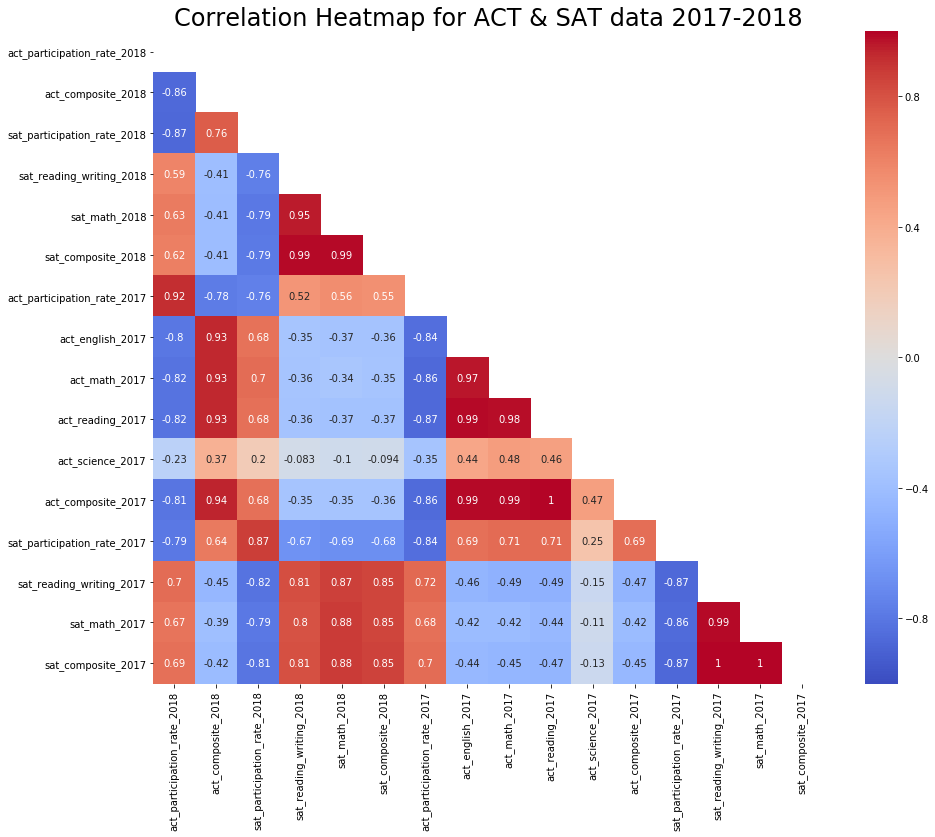

In [442]:
#code borrowed from Riley's lecture to cutoff top of heatmap

plt.figure(figsize=(15,12))
corr = combined.corr()



mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation Heatmap for ACT & SAT data 2017-2018',
         fontsize = 24)

sns.heatmap(corr,
            mask=mask,
           annot=True,
            vmin = -1,
            vmax = 1,
        cmap = "coolwarm"
           );


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [443]:
## CREATING A DICTIONARY TO REFERENCE FOR VALUE LABELS
global column_desc_dict
descs = ['ACT Participation Rates in 2018',
 'ACT Composite Scores in 2018',
 'SAT Participation Rates in 2018',
 'SAT Reading & Writing Scores in 2018',
 'SAT Math Scores in 2018',
 'SAT Composite Scores in 2018',
 'ACT Participation Rates in 2017',
 'ACT English Scores in 2017',
 'ACT Math Scores in 2017',
 'ACT Reading Scores in 2017',
 'ACT Science Scores in 2017',
 'ACT Composite Scores in 2017',
 'SAT Participation Rates in 2017',
 'SAT Reading & Writing Scores in 2017',
 'SAT Math Scores in 2017',
 'SAT Composite Scores in 2017'
]
column_desc_dict = dict(zip(combined.columns,descs))


In [665]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists

        ax[i].hist(dataframe[column])
        ax[i].set_title(column_desc_dict[column],
                       fontsize = 20)
        ax[i].set_xlabel(list_of_xlabels[i],
                        fontsize = 14)
        
        plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

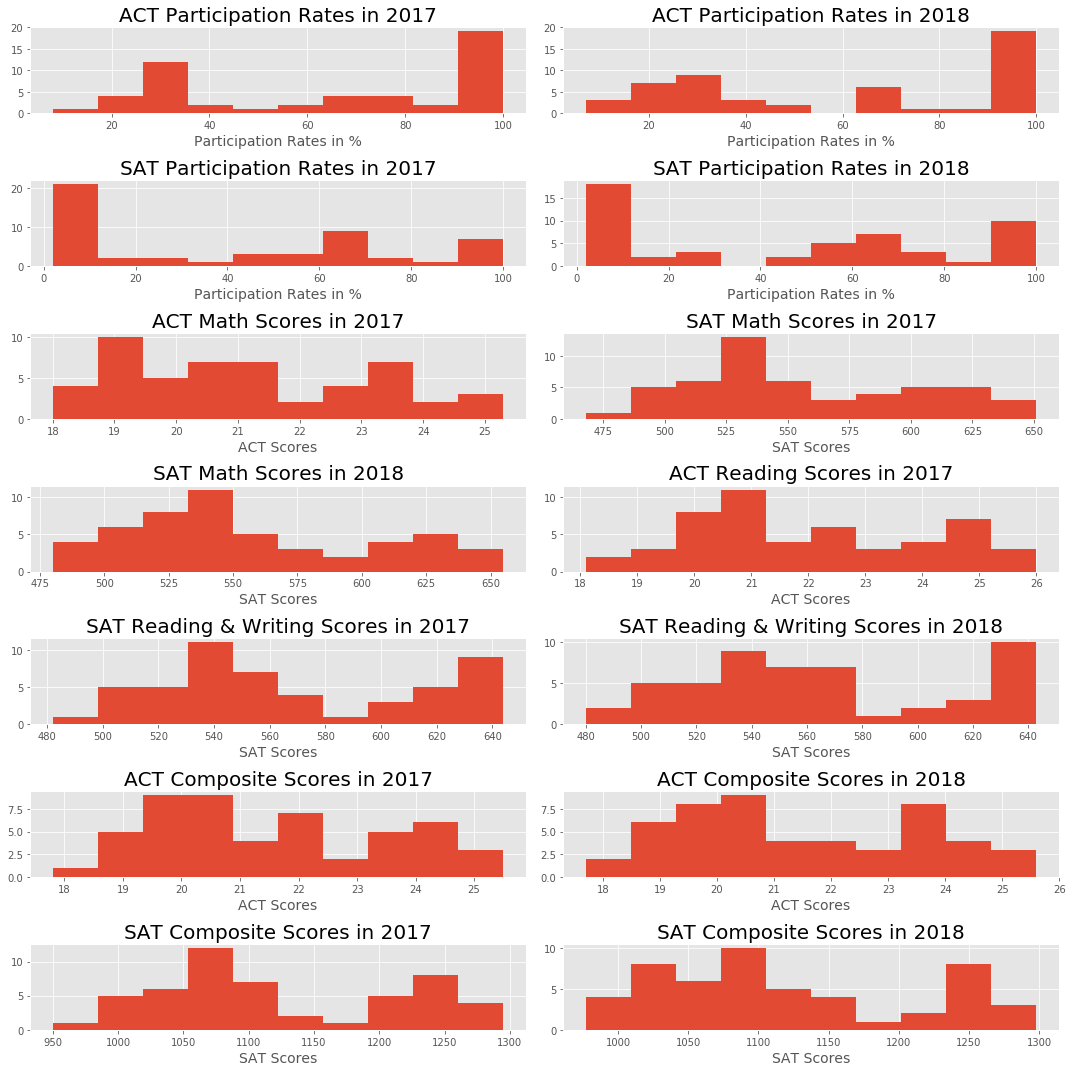

In [666]:
# 2 lists. One for the columns, one for labels
columns = ['act_participation_rate_2017',
           'act_participation_rate_2018',
           'sat_participation_rate_2017',
           'sat_participation_rate_2018',
           'act_math_2017',
           'sat_math_2017',
           'sat_math_2018',
           'act_reading_2017',
           'sat_reading_writing_2017',
           'sat_reading_writing_2018',
           'act_composite_2017',
           'act_composite_2018',
           'sat_composite_2017',
           'sat_composite_2018',
          ]
xlabels = ['Participation Rates in %',
         'Participation Rates in %',
         'Participation Rates in %',
         'Participation Rates in %',
         'ACT Scores',
         'SAT Scores',
         'SAT Scores',
           'ACT Scores',
           'SAT Scores',
           'SAT Scores',
           'ACT Scores',
           'ACT Scores',
           'SAT Scores',
           'SAT Scores'
           
         ]
subplot_histograms(combined, columns, titles, xlabels);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [667]:
# Code based on previous subplot function
def scatter_subplots(dataframe,scatter_columns):

    nrows = int(np.ceil(len(scatter_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, title in enumerate(scatter_columns): # Gives us an index value to get into all our lists
        columns, axes = scatter_columns[title]

        ax[i].scatter(dataframe[columns[0]],dataframe[columns[1]])
        ax[i].set_title(title,
                       fontsize = 20)
        
        plt.tight_layout()

In [448]:
scatter_dict = {
    'SAT vs. ACT math scores for 2017':[
        ['sat_math_2017','act_math_2017' ],
        ['SAT Math Scores 2017','ACT Math Scores 2017' ]
    ],
    'SAT vs. ACT verbal/reading scores for 2017':[
        ['sat_reading_writing_2017','act_reading_2017'],
        ['SAT Reading & Writing\nScores 2017','ACT Reading Scores 2017']
    ],
    'SAT vs. ACT total/composite scores for 2017':[
        ['sat_composite_2017','act_composite_2017'],
        ['SAT Total Scores 2017', 'ACT Composite Scores 2017']
    ],
    'Total scores for SAT 2017 vs. 2018':[
        ['sat_composite_2017','sat_composite_2018'],
        ['SAT Total Scores 2017','SAT Total Scores 2018']
    ],
    'Composite scores for ACT 2017 vs. 2018':[
        ['act_composite_2017','act_composite_2018'],
        ['ACT Composite Scores 2017','ACT Composite Scores 2018']
    ],
    'SAT and ACT Participation Rates(2017)':[
        ['sat_participation_rate_2017','act_participation_rate_2017'],
        ['SAT Participation Rates','ACT Participation Rates']
    ],
    'SAT and ACT Participation Rates(2018)':[
        ['sat_participation_rate_2018','act_participation_rate_2018'],
        ['SAT Participation Rates','ACT Participation Rates']
    ]
}

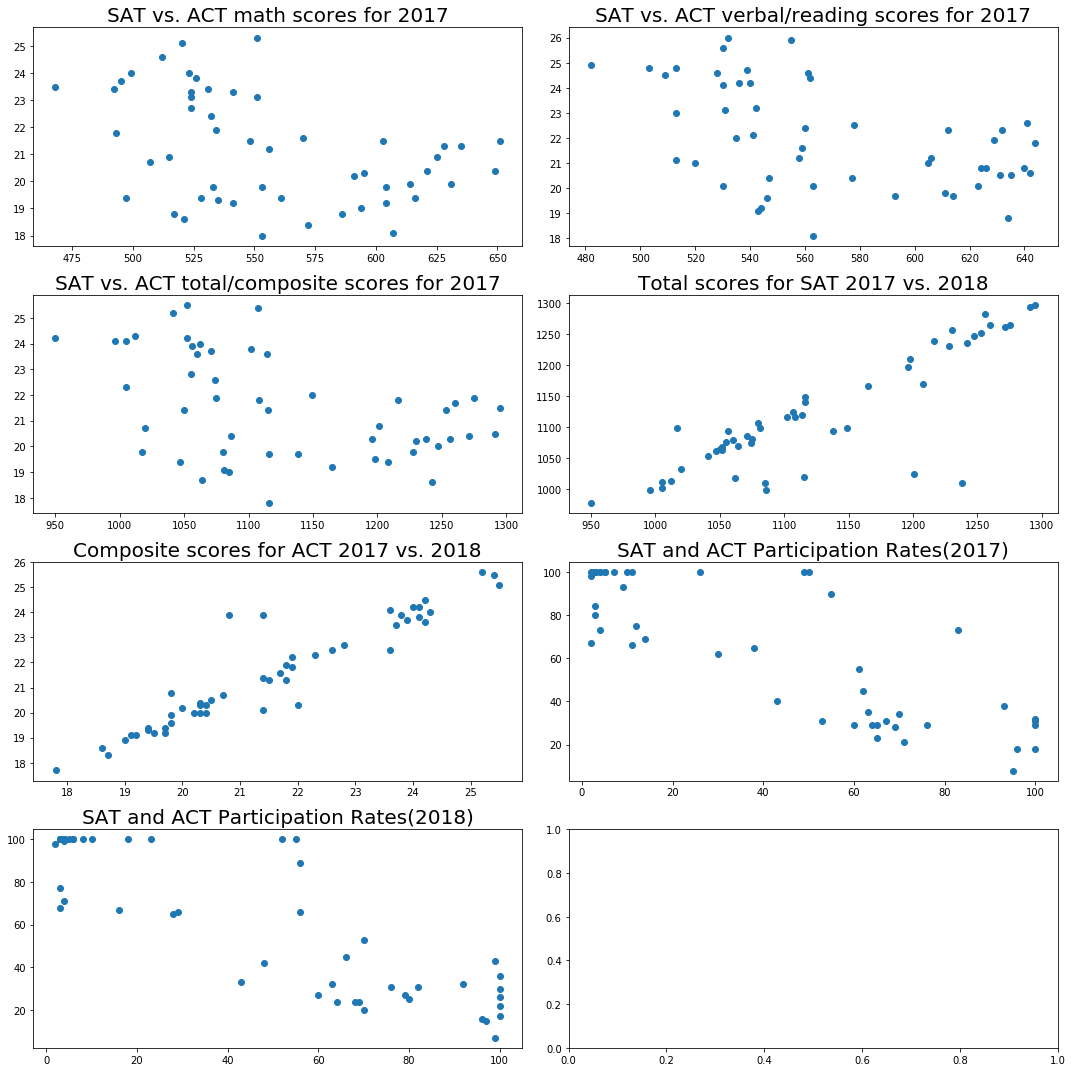

In [449]:
scatter_subplots(combined, scatter_dict)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [450]:
## Easily reusable boxplot function that accepts a list
## with a Title and list of columns to plot
def my_boxplot(title_cols,
               df=combined,
               column_desc_dict=column_desc_dict
              ):
    redsquare = dict(markerfacecolor='r', marker='s')
    title, *_ = title_cols
    cols = title_cols[1:]
    plt.figure(figsize=(20,5))
    sns.boxplot(data=df[cols],
                     flierprops=redsquare,
               )
    plt.title(title, fontsize = 20,);

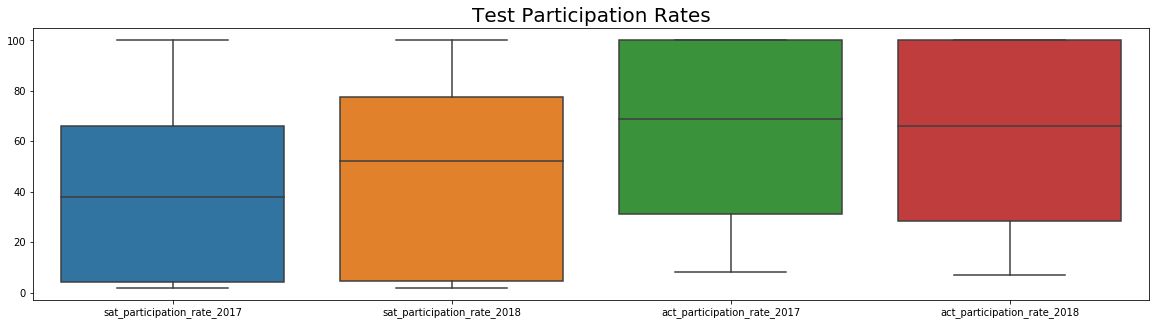

In [451]:
cols = ['Test Participation Rates',
        'sat_participation_rate_2017',
     'sat_participation_rate_2018',
     'act_participation_rate_2017',
     'act_participation_rate_2018'
    ]
my_boxplot(cols)

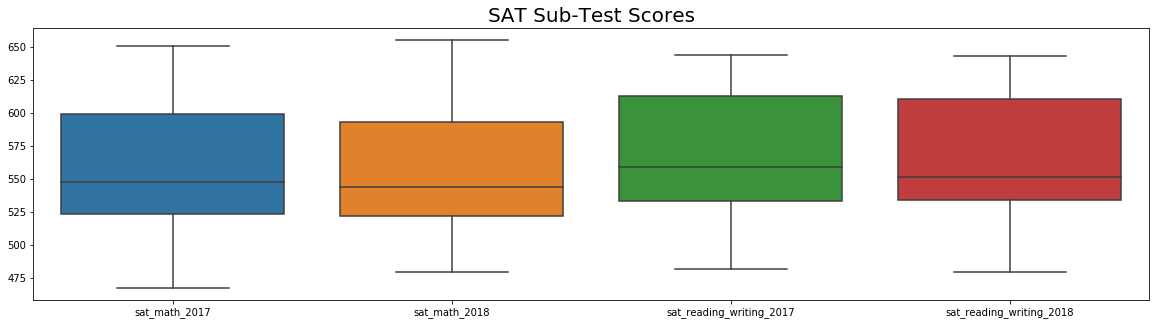

In [452]:
title_cols = [
    'SAT Sub-Test Scores',
    'sat_math_2017',
    'sat_math_2018',
    'sat_reading_writing_2017',
    'sat_reading_writing_2018'
]
    
my_boxplot(title_cols)


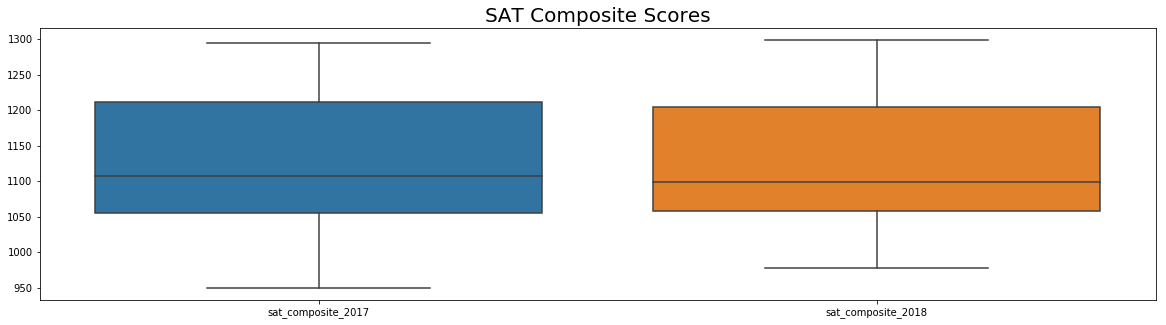

In [453]:
cols = ['SAT Composite Scores','sat_composite_2017','sat_composite_2018',]
my_boxplot(cols)


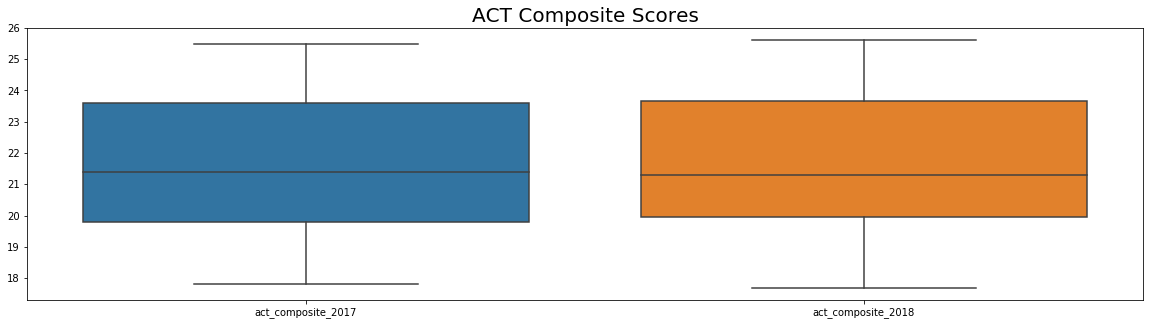

In [454]:
cols = ['ACT Composite Scores','act_composite_2017','act_composite_2018']
my_boxplot(cols)

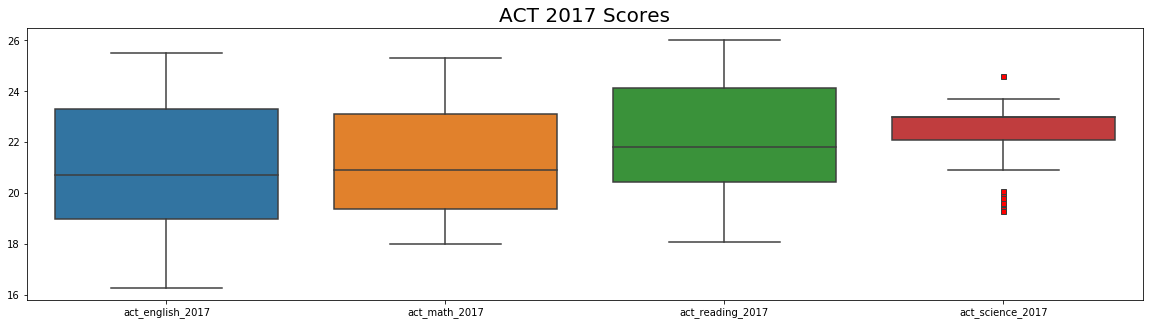

In [455]:

cols = ['ACT 2017 Scores','act_english_2017','act_math_2017', 'act_reading_2017','act_science_2017']
my_boxplot(cols)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [456]:
## Easily reusable regression plot function that accepts a list
## with a Title and list of columns to plot
def my_regplot(title_cols,
               df=combined,
               column_desc_dict=column_desc_dict
              ):
    x_data, y_data, title = title_cols
    plt.figure(figsize=(20,5))
    sns.regplot(x = x_data,
                y = y_data,
                data=df,           
                     )
    plt.xlabel(column_desc_dict[x_data], fontsize = 16)
    plt.ylabel(column_desc_dict[y_data], fontsize = 16)
    plt.title(title, fontsize = 20,);
    

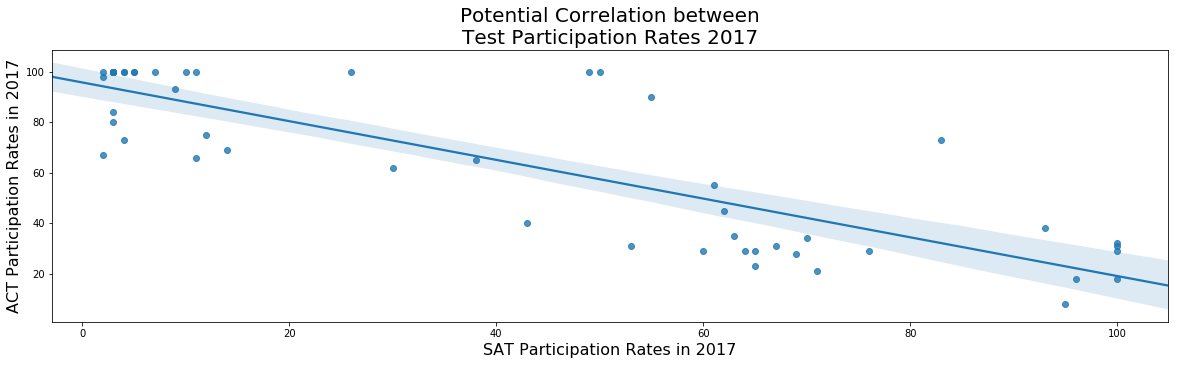

In [457]:
title_cols = ['sat_participation_rate_2017',
              'act_participation_rate_2017',
              'Potential Correlation between\nTest Participation Rates 2017'
             ]
my_regplot(title_cols)

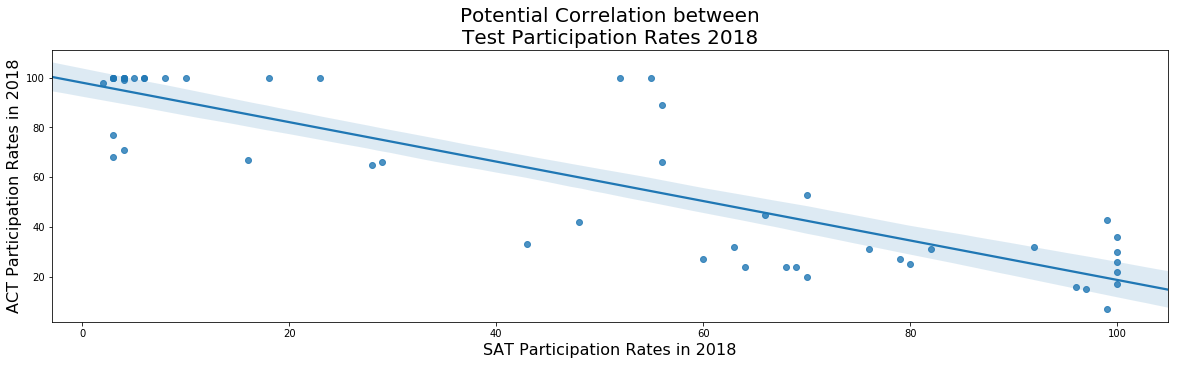

In [458]:
title_cols = ['sat_participation_rate_2018',
              'act_participation_rate_2018',
              'Potential Correlation between\nTest Participation Rates 2018'
             ]
my_regplot(title_cols)

Clearly there is a negative correlation between the rates of participation in each teach with each other.

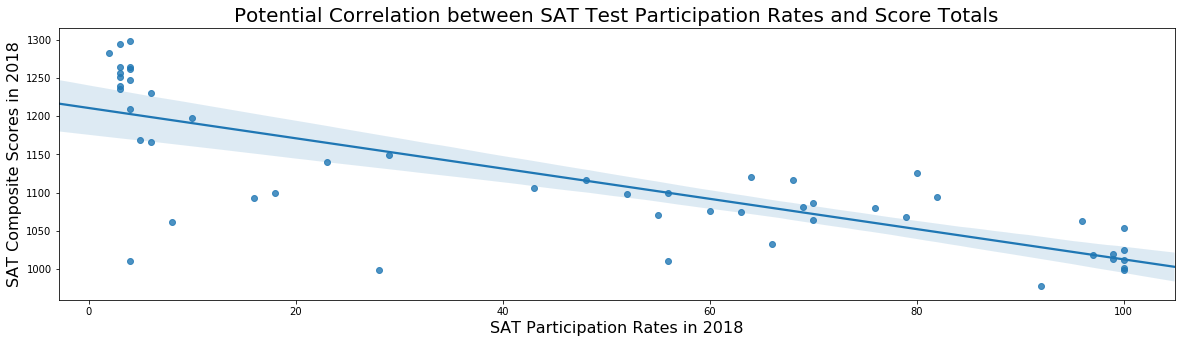

In [459]:
title_cols = ['sat_participation_rate_2018',
              'sat_composite_2018',
              'Potential Correlation between SAT Test Participation Rates and Score Totals'
             ]
my_regplot(title_cols)

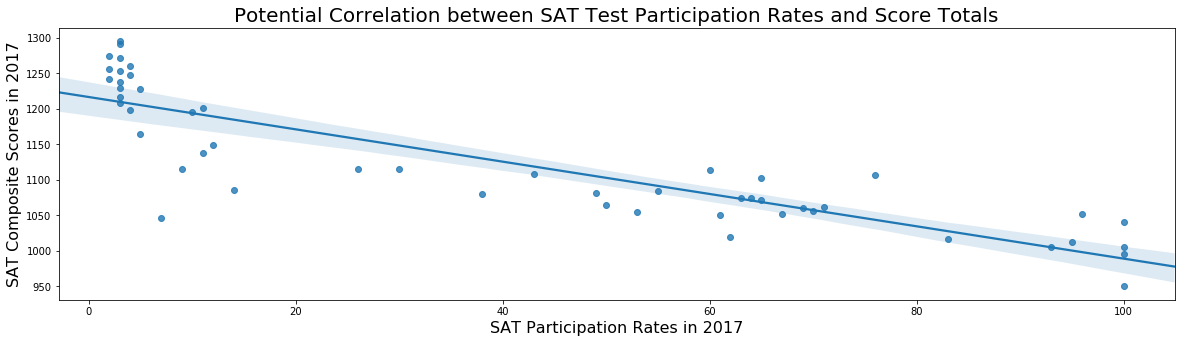

In [460]:
title_cols = ['sat_participation_rate_2017',
              'sat_composite_2017',
              'Potential Correlation between SAT Test Participation Rates and Score Totals'
             ]
my_regplot(title_cols)

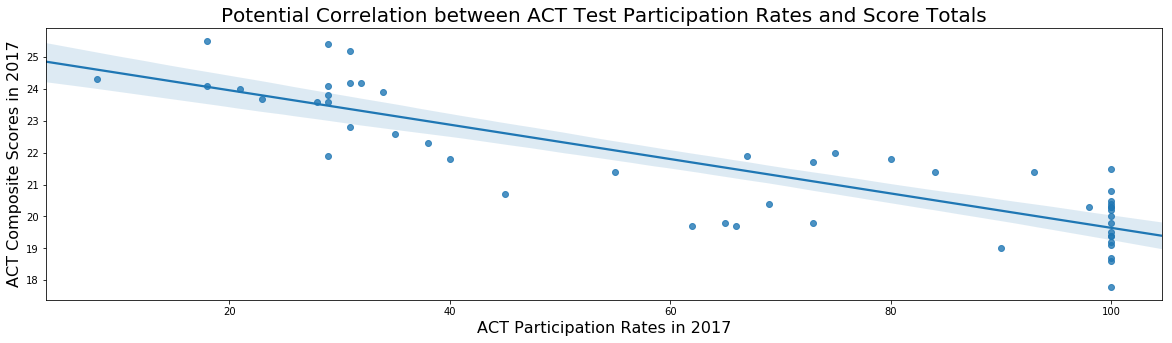

In [461]:
title_cols = ['act_participation_rate_2017',
              'act_composite_2017',
              'Potential Correlation between ACT Test Participation Rates and Score Totals'
             ]
my_regplot(title_cols)

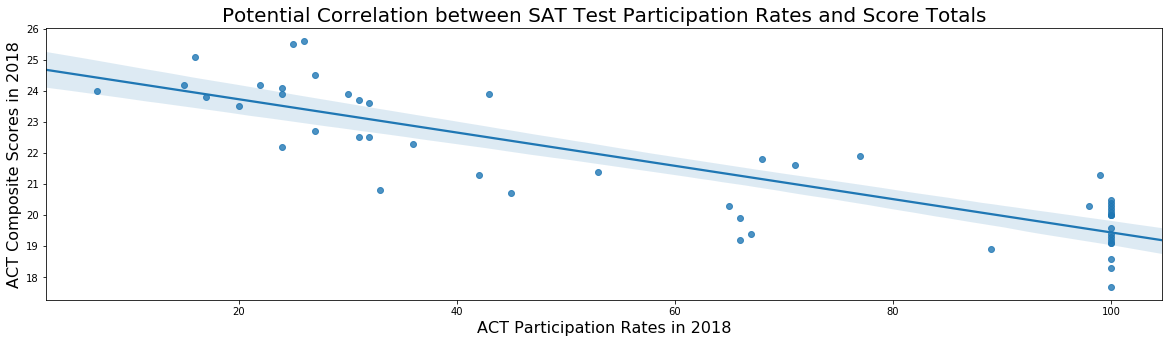

In [462]:
title_cols = ['act_participation_rate_2018',
              'act_composite_2018',
              'Potential Correlation between SAT Test Participation Rates and Score Totals'
             ]
my_regplot(title_cols)

The correlation between participation rates and scores is negative. Some potential explanations could be self-selection, overwhelm of prep courses, etc.

In [ ]:
#create change in participation rates
combined['sat_participation_rate_change'] = combined['sat_participation_rate_2018'] - combined['sat_participation_rate_2017']
combined['act_participation_rate_change'] = combined['act_participation_rate_2018'] - combined['act_participation_rate_2017']

In [506]:
# find the states with the highest rates of participation change
combined[['sat_participation_rate_2017','sat_participation_rate_2018','sat_participation_rate_change','act_participation_rate_change']].sort_values(by = ['sat_participation_rate_change','sat_participation_rate_2018'], ascending=False).head(10)

,sat_participation_rate_2017,sat_participation_rate_2018,sat_participation_rate_change,act_participation_rate_change
state,,,,
illinois,9,99,90,-50
colorado,11,100,89,-70
rhode island,71,97,26,-6
west virginia,14,28,14,-4
new jersey,70,82,12,-3
new york,67,79,12,-4
georgia,61,70,9,-2
idaho,93,100,7,-2
maryland,69,76,7,3


In [668]:
# find the states with the highest rates of participation change
combined[['sat_participation_rate_change','act_participation_rate_2017','act_participation_rate_2018','act_participation_rate_change']].sort_values(by = 'act_participation_rate_change', ascending=False).head(5)

,sat_participation_rate_change,act_participation_rate_2017,act_participation_rate_2018,act_participation_rate_change
state,,,,
ohio,6,75,100,25
nebraska,0,84,100,16
arizona,-1,62,66,4
maryland,7,28,31,3
oregon,5,40,42,2


In [669]:
#find the average growth rate in SAT
combined['sat_participation_rate_change'].mean()

5.9411764705882355

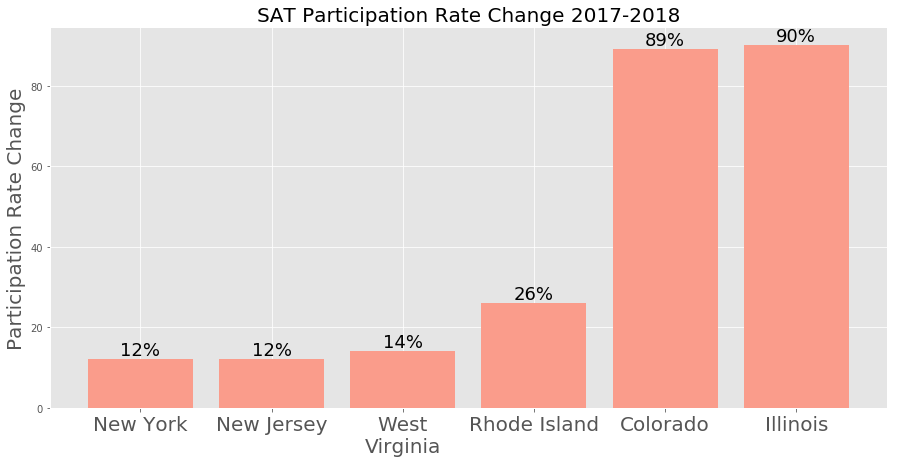

In [675]:
## Plot the top rates of participation change
growth_data = combined[['sat_participation_rate_change']].sort_values(by='sat_participation_rate_change').T
growth_data = growth_data[['new york',
                        'new jersey',
                        'west virginia',
                        'rhode island',
                        'colorado',
                        'illinois']]
# plt.bar(height = growth_data.values,
#        )

plt.style.use('ggplot')

x = ['New York', 'New Jersey', 'West\nVirginia','Rhode Island',
                        'Colorado',
                        'Illinois']
data = list(growth_data.loc[:,['new york',
                        'new jersey',
                        'west virginia','rhode island',
                        'colorado',
                        'illinois']].values[0])

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(15,7))
bar1 = plt.bar(x_pos, data, color='#FA9C8B')
#plt.xlabel("States", fontsize=20)
plt.ylabel("Participation Rate Change", fontsize=20)
plt.title("SAT Participation Rate Change 2017-2018", fontsize=20)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height) + '%', ha='center', va='bottom', fontsize=18)

plt.xticks(x_pos, x, fontsize=20)

plt.show()

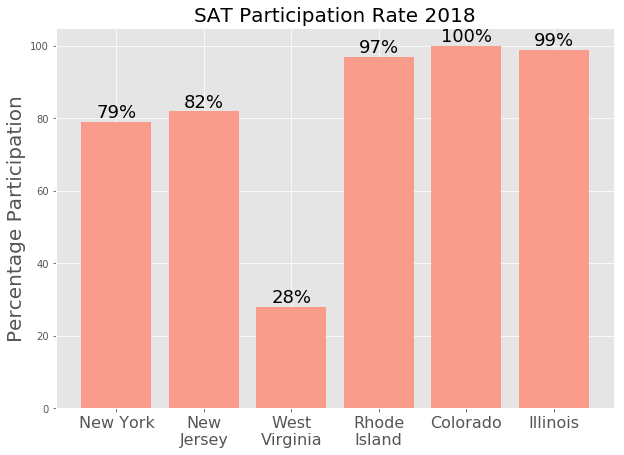

In [678]:
##Plot the participate rates

growth_data = combined[['sat_participation_rate_2018']].sort_values(by='sat_participation_rate_2018').T
growth_data = growth_data[['new york',
                        'new jersey',
                        'west virginia',
                        'rhode island',
                        'colorado',
                        'illinois']]
# plt.bar(height = growth_data.values,
#        )


x = ['New York', 'New\nJersey', 'West\nVirginia','Rhode\nIsland',
                        'Colorado',
                        'Illinois']
data = list(growth_data.loc[:,['new york',
                        'new jersey',
                        'west virginia','rhode island',
                        'colorado',
                        'illinois']].values[0])

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,7))
bar1 = plt.bar(x_pos, data, color='#FA9C8B')
plt.ylabel("Percentage Participation", fontsize=20)
plt.title("SAT Participation Rate 2018", fontsize=20)

#labelcode from https://stackoverflow.com/a/40491960
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height) + '%', ha='center', va='bottom', fontsize=18)

plt.xticks(x_pos, x, fontsize=16)

plt.show()

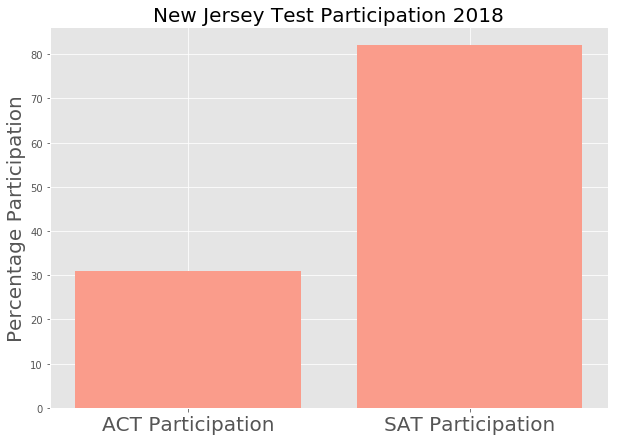

In [679]:
## Plot the test participation in 2018

act_vs_sat = list(combined.loc['new jersey',['act_participation_rate_2018','sat_participation_rate_2018']])
plt.style.use('ggplot')

x = ['ACT Participation','SAT Participation']
energy = act_vs_sat

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,7))
plt.bar(x_pos, energy, color='#FA9C8B')
#plt.xlabel("2018 Tests", fontsize=20)
plt.ylabel("Percentage Participation", fontsize=20)
plt.title("New Jersey Test Participation 2018", fontsize=20)

plt.xticks(x_pos, x, fontsize=20)

plt.show()



#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

While we will continue to build our analytic tools, we know that measures of central tendency, spread, and shape/skewness provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)

Be thorough in your verbal description of these distributions.
Be sure to back up these summaries with statistics.

### `act_participation_rate_2018`
- The average value is 62.0 with a standard deviation of 34.0.
- The values fall between 7 and 100 and a median value of 66.0
### `act_composite_2018`
- The average value is 21.0 with a standard deviation of 2.0.
- The values fall between 18.0 and 26.0 and a median value of 21.0
### `sat_participation_rate_2018`
- The average value is 46.0 with a standard deviation of 37.0.
- The values fall between 2 and 100 and a median value of 52.0
### `sat_reading_writing_2018`
- The average value is 564.0 with a standard deviation of 48.0.
- The values fall between 480 and 643 and a median value of 552.0
### `sat_math_2018`
- The average value is 556.0 with a standard deviation of 48.0.
- The values fall between 480 and 655 and a median value of 544.0
### `sat_composite_2018`
- The average value is 1120.0 with a standard deviation of 94.0.
- The values fall between 977 and 1298 and a median value of 1098.0
### `act_participation_rate_2017`
- The average value is 65.0 with a standard deviation of 32.0.
- The values fall between 8 and 100 and a median value of 69.0
### `act_english_2017`
- The average value is 21.0 with a standard deviation of 2.0.
- The values fall between 16.0 and 26.0 and a median value of 21.0
### `act_math_2017`
- The average value is 21.0 with a standard deviation of 2.0.
- The values fall between 18.0 and 25.0 and a median value of 21.0
### `act_reading_2017`
- The average value is 22.0 with a standard deviation of 2.0.
- The values fall between 18.0 and 26.0 and a median value of 22.0
### `act_science_2017`
- The average value is 22.0 with a standard deviation of 1.0.
- The values fall between 19.0 and 25.0 and a median value of 23.0
### `act_composite_2017`
- The average value is 22.0 with a standard deviation of 2.0.
- The values fall between 18.0 and 26.0 and a median value of 21.0
### `sat_participation_rate_2017`
- The average value is 40.0 with a standard deviation of 35.0.
- The values fall between 2 and 100 and a median value of 38.0
### `sat_reading_writing_2017`
- The average value is 569.0 with a standard deviation of 46.0.
- The values fall between 482 and 644 and a median value of 559.0
### `sat_math_2017`
- The average value is 557.0 with a standard deviation of 47.0.
- The values fall between 468 and 651 and a median value of 548.0
### `sat_composite_2017`
- The average value is 1126.0 with a standard deviation of 92.0.
- The values fall between 950 and 1295 and a median value of 1107.0
### `sat_participation_rate_change`
- The average value is 6.0 with a standard deviation of 18.0.
- The values fall between -27 and 90 and a median value of 1.0
### `act_participation_rate_change`
- The average value is -4.0 with a standard deviation of 13.0.
- The values fall between -70 and 25 and a median value of -1.0

In [682]:
def desc_table(dataframe):
    for col in dataframe.columns:
        print(f'### `{col}`')
        print(f'- The average value is {round(dataframe[col].mean(),0)} with a standard deviation of {round(dataframe[col].std(),0)}.')
        print(f'- The values fall between {round(dataframe[col].min(),0)} and {round(dataframe[col].max(),0)} and a median value of {round(dataframe[col].median(),0)}')

#desc_table(combined)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: generally it does but there are clear reasons from the data why participation rates are not trending in that way.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
- Math: holds true for the SAT scores and somewhat for the ACT scores based on the shape of histogram. This should maintain reasonable estimates from the data.
- Reading: relatively true with outliers at the top end. This should maintain reasonable estimates from the data.
- Rates: does not hold true. This can lead to to the distortions and outliers of the data since we see a negative correlation between rate of testing and scores.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Given what we have covered in regards to these statistically sampling I would say it has problems given that these tests are opt-in which can result in poor samples in terms or representation of populations.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Not without normalizing them to a percentage score. They use a different scale.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

[West Virginia Adopts SAT as State Test](https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for/article_b60d2618-4943-56f6-b180-4b4442172ef8.html)

    
[Under the court-approved settlement, the state will allow high school juniors and seniors to graduate if they have passing scores on state PARCC exams or other approved standardized tests, such as the SAT, ACT or the military placement exam.](https://www.northjersey.com/story/news/2019/02/15/nj-reaches-deal-over-graduation-parcc-testing-education-law-center/2879823002/)


N

why are IL, CO and RI so high in participation?

[Illinois uses SAT as state HS test](https://www.testive.com/illinois/)

[Colorado does too](https://www.testive.com/colorado-sat-change-2017/)

[Rhode Island as well.](https://www.ride.ri.gov/InstructionAssessment/Assessment/PSATandSAT.aspx)





## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Key takeaways:
- From a saturation perspective, test scores should either be ignored or not used as a marketing point.
- Ubiquity across states is a marketing point in terms of comparison.
- On the ground realities and legal issues play into moving towards full participation
- There are clear regional differences
- Students and parents in New Jersey are in need of a qualifying test for High School graduation.
- New Jersey is the 11th largest state - small percentages are large total gains




Potential points of analysis and action
- Existing customer demographic information
- Geographic & socioeconomic analysis
- Marketing push based on this information

Additional Data
- Graduation requirements per state
- Socioeconomic information of SAT test takers
- Destinations for test-takers & list of colleges that accept/don't accept SAT




